### Importação, 1ª exploração e pré-tratamento
Objetivo: buscar problemas no dataset survey da empresa BookMe para pré tratá-lo

| Attribute | Description |
| ---------- | --------- |
|Name | Customer’s name |
|Year Birth | Customer’s birth year |
|Longevity | Whether the customer registered more than 1 year ago or not (yes or no)|
|Churn| Whether the customer churned or not (churn or nochurn) - stopped using|
|TypeTravel| Customer’s reason for travelling (business or leisure)
|RoomType |Type of room reserved
|RewardPoints| Customer’s rewarding point for loyalty
|Comfort| Satisfaction level of customer regarding comfort of the room (0 to 5)
|ReceptionSchedule| Satisfaction level of customer regarding reception schedule (0 to 5)
|FoodDrink |Satisfaction level of customer regarding food and drink available (0 to 5)
|Location| Satisfaction level of customer regarding accommodation location (0 to 5)
|Wifi |Satisfaction level of customer regarding wi-fi service (0 to 5)
|Amenities| Satisfaction level of customer regarding accommodation amenities (0 to 5)
|Staff| Satisfaction level of customer regarding staff (0 to 5)
|OnlineBooking |Satisfaction level of customer regarding online booking ease (0 to 5)
|PriceQuality| Satisfaction level of customer regarding price quality relationship (0 to 5)
|RoomSpace| Satisfaction level of customer regarding room space (0 to 5)
|CheckOut| Satisfaction level of customer regarding check-out (0 to 5)
|CheckIn| Satisfaction level of customer regarding check-in (0 to 5)
|Cleanliness| Satisfaction level of customer regarding cleanliness (0 to 5)
|BarService| Satisfaction level of customer regarding bar service (0 to 5

In [116]:
df = pd.read_csv("cluster.csv")
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


Observa-se a seguir que:
1. Ano de nascimento como float64 invés de int64.
2. Ano de nascimento possui NULL's.

<a id='prod_pca'></a>

### 4.1.1.  Prespétiva da Satisfação 

##### MC

Numa perspetiva de satisfação vamos procurar identificar as variaveis mais relevantes, com recurso a aplicação do PCA.

Utiliza-se o PCA com o objetivo de reduzir o número de variáveis, no entanto tem que se manter o minimo de informação. O PCA é um método para reduzir a dimensão dos dados. Escolhendo as variáveis mais importantes.

In [35]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Age', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService',
       'Overall', 'Gender'],
      dtype='object')

In [36]:

dfSatis=df.iloc[:,7:21]
dfSatis

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3,4,1,4,4,3,4,3,3,3,3,4,3,4
1,1,1,1,1,5,3,4,5,5,5,5,1,5,2
2,3,3,3,3,1,4,4,3,3,2,3,2,3,1
3,1,1,1,1,4,4,5,4,4,4,4,4,4,3
4,2,2,3,2,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,2,0,2,2,3,2,4,3,4,5,1,3,4,3
15585,3,3,3,3,5,3,5,5,3,1,3,4,4,5
15586,1,1,1,1,3,4,5,4,4,4,4,5,4,4
15587,4,3,4,4,5,4,5,5,2,5,4,3,4,5


- Devemos estandardizar os dados 

In [82]:
dfSatis_stand = StandardScaler().fit_transform(dfSatis) # Scikit-learn tem um conjunto de classes no módulo de pre-processamento para a estandardização dos dados.

Ao se aplicar a função de estandardização dos dados, transformamos os dados, num array numpy. Devemos ajustar novamente para um dataframe.

In [83]:
dfSatis_stand = pd.DataFrame(dfSatis_stand,columns=dfSatis.columns)
dfSatis_stand.head()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,0.115440,0.660082,-1.283461,0.780559,0.576375,-0.274228,0.376845,-0.344249,-0.360337,-0.364292,-0.605244,0.530474,-0.598754,0.505144
1,-1.325682,-1.313224,-1.283461,-1.528337,1.332611,-0.274228,0.376845,1.181497,1.215784,1.181570,1.121694,-1.837383,1.132182,-1.033994
2,0.115440,0.002313,0.108855,0.010927,-1.692334,0.464893,0.376845,-0.344249,-0.360337,-1.137222,-0.605244,-1.048097,-0.598754,-1.803563
3,-1.325682,-1.313224,-1.283461,-1.528337,0.576375,0.464893,1.134137,0.418624,0.427724,0.408639,0.258225,0.530474,0.266714,-0.264425
4,-0.605121,-0.655455,0.108855,-0.758705,1.332611,1.204013,1.134137,1.181497,1.215784,-0.364292,0.258225,-1.837383,-0.598754,1.274713


In [84]:
pca=PCA() #Cria um pca
pca.fit(dfSatis_stand) #Determina os scores e a variância que cada componente principal contribuir para a variância total
pca_data=pca.transform(dfSatis_stand)#Obtenção das coordenadas para o gráfico do PCA 


array([[ 0.22433132,  0.04679902,  1.07867138, ...,  0.00435212,
        -1.17001159, -0.48440897],
       [-0.75066976,  3.07252698, -1.3318316 , ...,  0.82073923,
         0.10396972,  0.27010388],
       [ 1.8654753 , -0.89985866,  0.04085283, ...,  1.02654568,
        -0.25010891,  0.86150093],
       ...,
       [-0.70019797,  2.90740636, -0.16894675, ...,  0.1910051 ,
         0.20936688,  0.13600702],
       [-2.26129671, -0.48023139,  1.44576457, ...,  0.05713482,
         0.1105797 , -0.00605007],
       [ 0.48375506, -0.28963183, -0.51087122, ..., -0.12302005,
         0.03396389, -0.44534148]])

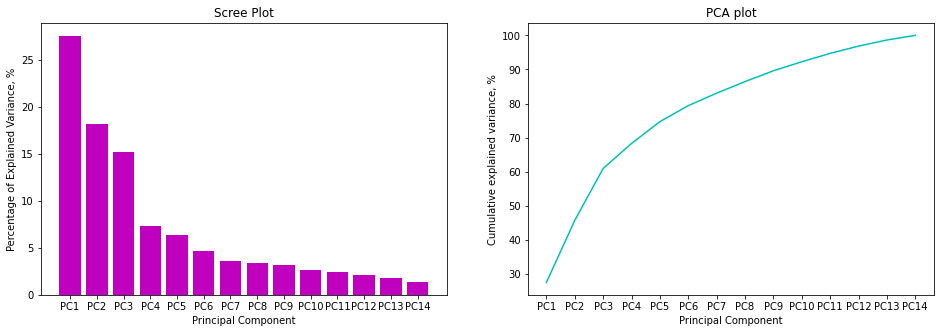

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
per_var=np.round(pca.explained_variance_ratio_*100,decimals=6)  #Calcula a % da variância que é explicada pela componente principal  
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]  #Cria diferentes labels, para cada um dos componentes principais.  
axes[0].bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels, color='m') #Cria um gráfico de barras
axes[0].set_ylabel('Percentage of Explained Variance, %')
axes[0].set_xlabel('Principal Component')
axes[0].set_title('Scree Plot')

axes[1].plot(labels,np.cumsum(per_var), color='c')
axes[1].set_ylabel('Cumulative explained variance, %')
axes[1].set_xlabel('Principal Component')
axes[1].set_title('PCA plot')
plt.show()


In [54]:
np.cumsum(per_var)

array([ 27.554389,  45.741361,  60.971693,  68.299207,  74.696436,
        79.398679,  83.048286,  86.436611,  89.615917,  92.260561,
        94.714078,  96.846797,  98.635239, 100.      ])

As primeiras 9 componentes explicam **89,6%** da variância total. Dado que o modelo original possui apenas 14 variáveis, não se assume como necessário o recurso ao PCA.


<a id='cust_pca'></a>

### 4.1.2. Prespetiva do cliente

In [86]:
dfClientes=df[['Churn','Longevity', 'Age', 'TypeTravel', 'RewardPoints','Gender']]
dfClientes

,Churn,Longevity,Age,TypeTravel,RewardPoints,Gender
0,churn,yes,48,business,4907,Female
1,nochurn,yes,57,business,6724,Male
2,churn,yes,49,business,4365,Male
3,nochurn,yes,29,leisure,3849,Female
4,nochurn,yes,33,business,5376,Male
...,...,...,...,...,...,...
15584,churn,no,34,business,4968,Female
15585,churn,no,22,business,4970,Female
15586,nochurn,yes,58,business,4046,Male
15587,nochurn,yes,30,leisure,5155,Male


In [87]:
#dfClientes['Churn']=list(map(lambda x:0 if x=='churn' else 1,dfClientes['Churn']))
dfClientes['Churn']=dfClientes['Churn'].replace('churn',1)
dfClientes['Churn']=dfClientes['Churn'].replace('nochurn',0)
dfClientes['Longevity']=dfClientes['Longevity'].replace('yes',1)
dfClientes['Longevity']=dfClientes['Longevity'].replace('no',0)
dfClientes['TypeTravel']=dfClientes['TypeTravel'].replace('business',1)
dfClientes['TypeTravel']=dfClientes['TypeTravel'].replace('leisure',0)
dfClientes['Gender']=dfClientes['Gender'].replace('Male',1)
dfClientes['Gender']=dfClientes['Gender'].replace('Female',0)
print(dfClientes)

       Churn  Longevity  Age  TypeTravel  RewardPoints  Gender
0          1          1   48           1          4907       0
1          0          1   57           1          6724       1
2          1          1   49           1          4365       1
3          0          1   29           0          3849       0
4          0          1   33           1          5376       1
...      ...        ...  ...         ...           ...     ...
15584      1          0   34           1          4968       0
15585      1          0   22           1          4970       0
15586      0          1   58           1          4046       1
15587      0          1   30           0          5155       1
15588      1          1   39           1          5136       1

[15355 rows x 6 columns]


C:\Users\MABCOL~1\AppData\Local\Temp/ipykernel_1500/1883936626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClientes['Churn']=dfClientes['Churn'].replace('churn',1)
C:\Users\MABCOL~1\AppData\Local\Temp/ipykernel_1500/1883936626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClientes['Churn']=dfClientes['Churn'].replace('nochurn',0)
C:\Users\MABCOL~1\AppData\Local\Temp/ipykernel_1500/1883936626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [89]:
dfClientes_normalizado = StandardScaler().fit_transform(dfClientes)

In [90]:
dfClientes_stand = pd.DataFrame(dfClientes_normalizado,columns=dfClientes.columns)

In [ ]:
pca=PCA() 
pca.fit(dfClientes_stand) 
pca_data=pca.transform(dfClientes_stand)

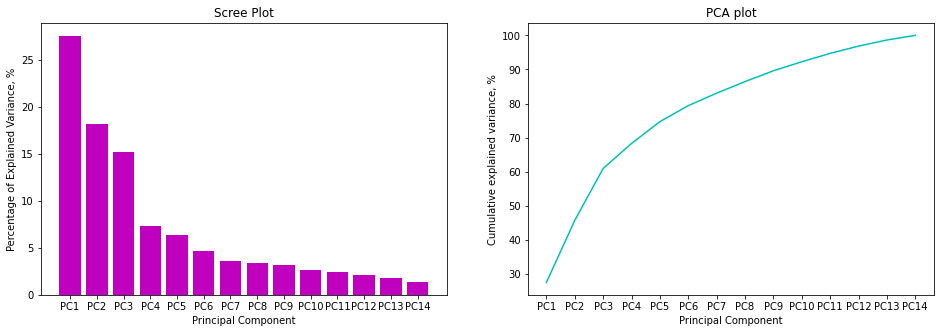

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
per_var=np.round(pca.explained_variance_ratio_*100,decimals=6)   
labels=['PC'+str(x) for x in range(1,len(per_var)+1)] 
axes[0].bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels, color='m') 
axes[0].set_ylabel('Percentage of Explained Variance, %')
axes[0].set_xlabel('Principal Component')
axes[0].set_title('Scree Plot')

axes[1].plot(labels,np.cumsum(per_var), color='c') #Create a bar plot
axes[1].set_ylabel('Cumulative explained variance, %')
axes[1].set_xlabel('Principal Component')
axes[1].set_title('PCA plot')
plt.show()

In [92]:
np.cumsum(per_var)

array([ 27.554389,  45.741361,  60.971693,  68.299207,  74.696436,
        79.398679,  83.048286,  86.436611,  89.615917,  92.260561,
        94.714078,  96.846797,  98.635239, 100.      ])

In [ ]:
- As primeiras 9 componentes explicam **89,6%** da variação dos dados. Não é necessário recorrer a PCA pois temos apenas 14 variáveis.

In [131]:
#Os pesos das componentes principais ...
pca.components_[9]  # Como se definiram 13 componentes, logo sendo a primeira a de zero...só podemos ir até 13.


array([ 0.46754168,  0.00434447, -0.08876444, -0.24799887, -0.57479496,
       -0.4046191 ,  0.19263395,  0.14407396,  0.01417342, -0.04935163,
       -0.06116053,  0.0624834 , -0.13272917,  0.36350246])

In [132]:
#Quantas componentes explicam pelo menos 90% da variância

# Variância das componentes principais
pca.explained_variance_ratio_
#Para apenas se considerar 2 casas décimais
np.round(pca.explained_variance_ratio_,2)

array([0.27, 0.2 , 0.14, 0.08, 0.06, 0.04, 0.04, 0.03, 0.03, 0.03])

In [133]:
print("Conclui-se que ",np.round(pca.explained_variance_ratio_,2)[0], "da variabilidade dos dados é explicada pela primeira variavel")

Conclui-se que  0.27 da variabilidade dos dados é explicada pela primeira variavel


In [134]:
pca.explained_variance_ratio_.cumsum()

array([0.27078793, 0.47531384, 0.61205368, 0.68919973, 0.7518017 ,
       0.79611752, 0.83430771, 0.86929685, 0.899235  , 0.92434339])

Logo, apenas com 6 componentes principais é que consegue explicar mais de 80% da variabilidade total dos dados.

In [144]:
np.round(np.linalg.eig(S)[0],2)

array([6.58, 4.97, 3.32, 1.87, 1.52, 1.08, 0.33, 0.93, 0.85, 0.73, 0.61,
       0.52, 0.49, 0.5 ])

<function matplotlib.pyplot.show(close=None, block=None)>

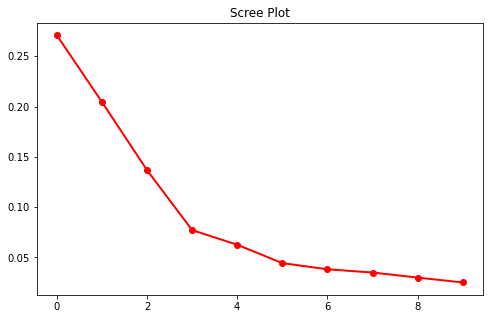

In [150]:
fig=plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_,'ro-',linewidth=2)
plt.title("Scree Plot")
plt.show

In [151]:
#Como usamos as componentes principais na prática...
pca.transform(X)

array([[ 0.1530489 ,  0.13127386,  1.29581181, ..., -0.01563322,
         0.21872591,  0.16634506],
       [ 0.14164132,  4.20833265, -1.84325092, ..., -0.50767373,
         0.18964837, -1.69701304],
       [ 2.07142338, -1.54014607,  0.31067527, ...,  1.47493967,
        -0.27471613,  0.38611383],
       ...,
       [-0.02990792,  4.12017155, -0.52880942, ...,  0.49443046,
        -0.07282345,  0.30252419],
       [-3.22234167,  0.03111298,  1.64487938, ..., -0.22917281,
        -1.20252899, -0.14113053],
       [ 0.56853605, -0.51505667, -0.64706452, ..., -0.12606375,
         0.39108159, -0.08201142]])